In [1]:
# Scaling with RobustScaler, StandardScaler, MinMaxScaler, MaxAbsScaler
import pandas as pd
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, MaxAbsScaler

# Load the dataset
df = pd.read_csv(r"C:\Users\Admin\Downloads\Test_data.csv")

# Identify numerical columns for scaling (excluding the target variable and employee_id)
numerical_cols = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'avg_training_score']

# Handle missing values in numerical columns (fill with median or mode as appropriate)
df['previous_year_rating'].fillna(df['previous_year_rating'].mode()[0], inplace=True)
df['age'].fillna(df['age'].median(), inplace=True)
df['length_of_service'].fillna(df['length_of_service'].median(), inplace=True)
df['avg_training_score'].fillna(df['avg_training_score'].median(), inplace=True)
df['no_of_trainings'].fillna(df['no_of_trainings'].median(), inplace=True)

def apply_scalers(df, numerical_cols, scalers):
    """
    Applies various scalers to the numerical columns of a DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.
        numerical_cols (list): A list of column names to be scaled.
        scalers (dict): A dictionary of scaler names and their corresponding scaler objects.

    Returns:
        dict: A dictionary where keys are scaler names and values are DataFrames
              with numerical columns scaled by the respective scaler.
    """
    scaled_datasets = {}
    for scaler_name, scaler in scalers.items():
        df_scaled = df.copy()
        df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])
        scaled_datasets[scaler_name] = df_scaled
    return scaled_datasets

# Define the scalers
scalers = {
    'RobustScaler': RobustScaler(),
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'MaxAbsScaler': MaxAbsScaler()
}

# Apply the scalers
scaled_data = apply_scalers(df, numerical_cols, scalers)

# Display a sample of the scaled data for each scaler
for scaler_name in scaled_data:
    print(f"\nSample of data scaled with {scaler_name}:")


Sample of data scaled with RobustScaler:

Sample of data scaled with StandardScaler:

Sample of data scaled with MinMaxScaler:

Sample of data scaled with MaxAbsScaler:


C:\Users\Admin\AppData\Local\Temp\ipykernel_9364\234528318.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['previous_year_rating'].fillna(df['previous_year_rating'].mode()[0], inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_9364\234528318.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

In [2]:
#  Scaling Techniques Demonstration
#  Step 1: Import Required Libraries
import pandas as pd
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, MaxAbsScaler

# Step 2: Load the Dataset
df = pd.read_csv(r"C:\Users\Admin\Downloads\Test_data.csv")
df.head()

#  Step 3: Handle Missing Values (Pandas FutureWarning-safe way)
df['previous_year_rating'] = df['previous_year_rating'].fillna(df['previous_year_rating'].mode()[0])
df['age'] = df['age'].fillna(df['age'].median())
df['length_of_service'] = df['length_of_service'].fillna(df['length_of_service'].median())
df['avg_training_score'] = df['avg_training_score'].fillna(df['avg_training_score'].median())
df['no_of_trainings'] = df['no_of_trainings'].fillna(df['no_of_trainings'].median())

#  Step 4: Define Numerical Columns to Scale
numerical_cols = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'avg_training_score']

# 🛠️ Step 5: Define Function to Apply Scalers
def apply_scalers(df, numerical_cols, scalers):
    scaled_datasets = {}
    for scaler_name, scaler in scalers.items():
        df_scaled = df.copy()
        df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])
        scaled_datasets[scaler_name] = df_scaled
    return scaled_datasets

# 🧮 Step 6: Define Scalers and Apply Them
scalers = {
    'RobustScaler': RobustScaler(),
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'MaxAbsScaler': MaxAbsScaler()
}
scaled_data = apply_scalers(df, numerical_cols, scalers)

# 🔍 Step 7: View Sample of Scaled Data
for scaler_name, data in scaled_data.items():
    print(f"\nSample of data scaled with {scaler_name}:")
    print(data[numerical_cols].head())



Sample of data scaled with RobustScaler:
   no_of_trainings  age  previous_year_rating  length_of_service  \
0              0.0 -0.9                   0.0              -1.00   
1              0.0 -0.2                   0.0               0.00   
2              0.0 -0.2                  -2.0              -0.25   
3              2.0 -0.2                  -1.0               1.00   
4              0.0 -0.3                   1.0               0.50   

   avg_training_score  
0                0.68  
1               -0.36  
2               -0.52  
3                0.20  
4                0.04  

Sample of data scaled with StandardScaler:
   no_of_trainings       age  previous_year_rating  length_of_service  \
0        -0.423094 -1.404150             -0.257191          -1.143200   
1        -0.423094 -0.492612             -0.257191          -0.192590   
2        -0.423094 -0.492612             -1.900667          -0.430243   
3         2.905264 -0.492612             -1.078929           0.758019


 Training: XGBoost
 Accuracy: 0.6982


c:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [22:03:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


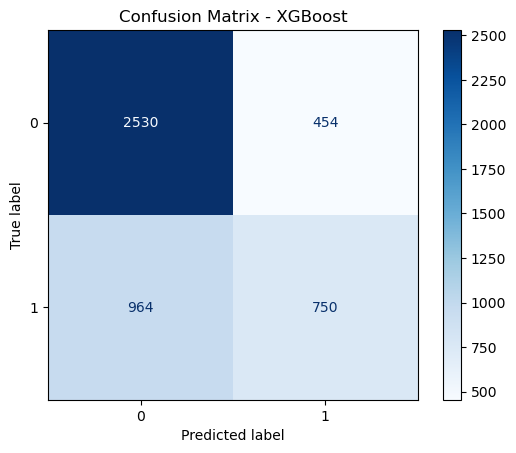


 Training: CatBoost
 Accuracy: 0.7048


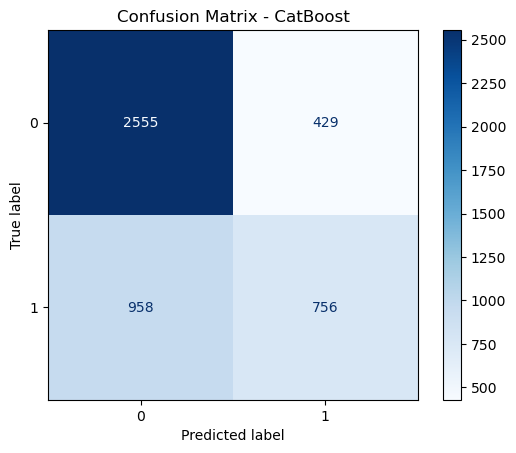


 Training: LightGBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 6715, number of negative: 12077
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001615 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 243
[LightGBM] [Info] Number of data points in the train set: 18792, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.357333 -> initscore=-0.586959
[LightGBM] [Info] Start training from score -0.586959
 Accuracy: 0.7092


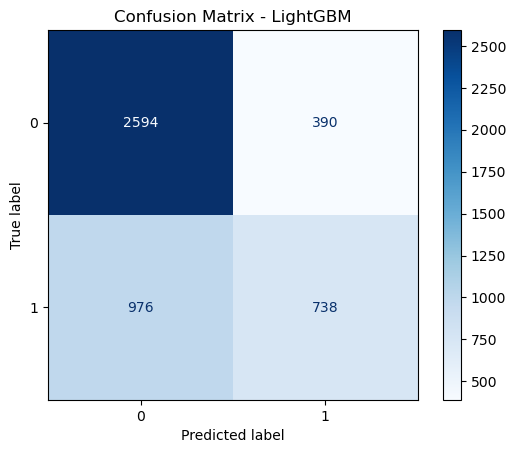

In [3]:
#  ML Model Building: Binary Classification
# Using XGBoost, CatBoost, and LightGBM to classify the target variable.

#  Import Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt

#  Load Preprocessed Scaled Dataset
df = pd.read_csv(r"C:\Users\Admin\Downloads\Test_data.csv")

# Fill missing values
df['previous_year_rating'] = df['previous_year_rating'].fillna(df['previous_year_rating'].mode()[0])
df['age'] = df['age'].fillna(df['age'].median())
df['length_of_service'] = df['length_of_service'].fillna(df['length_of_service'].median())
df['avg_training_score'] = df['avg_training_score'].fillna(df['avg_training_score'].median())
df['no_of_trainings'] = df['no_of_trainings'].fillna(df['no_of_trainings'].median())

# Define target and features
target = 'KPIs_met >80%'
X = df.drop(columns=['employee_id', target])
X = pd.get_dummies(X, drop_first=True)
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Models
models = {
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

# 🧪 Train and Evaluate Models
for name, model in models.items():
    print(f"\n Training: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f" Accuracy: {acc:.4f}")

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()



 Training XGBoost with StandardScaler
✅ Accuracy: 0.6982


c:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [22:03:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


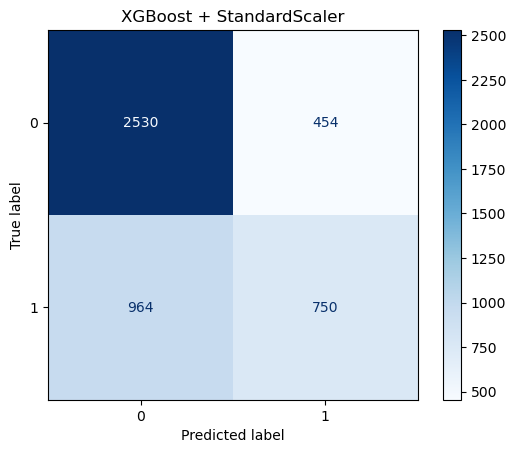


 Training CatBoost with StandardScaler
✅ Accuracy: 0.7048


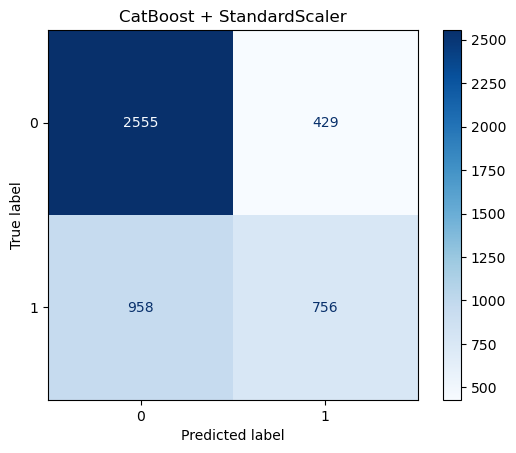


 Training LightGBM with StandardScaler
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 6715, number of negative: 12077
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000714 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 243
[LightGBM] [Info] Number of data points in the train set: 18792, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.357333 -> initscore=-0.586959
[LightGBM] [Info] Start training from score -0.586959
✅ Accuracy: 0.7092


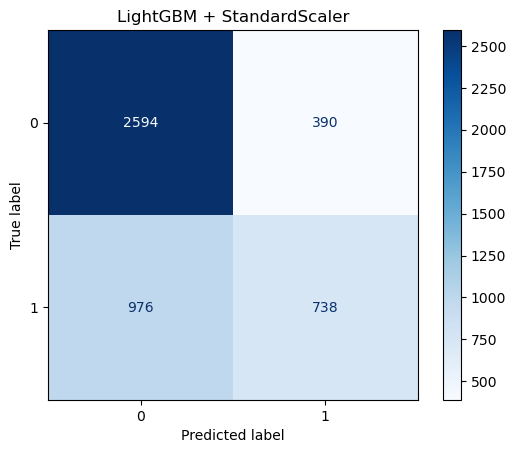


 Training XGBoost with MinMaxScaler
✅ Accuracy: 0.6982


c:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [22:03:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


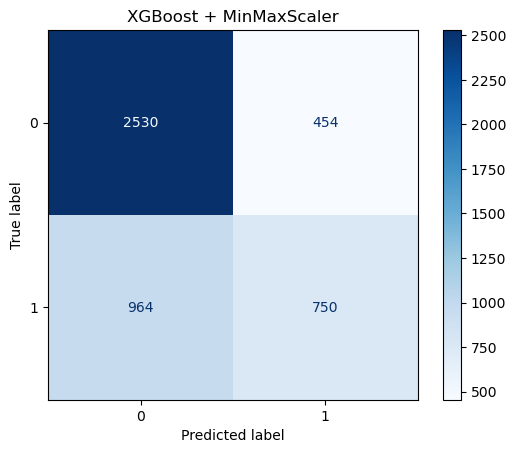


 Training CatBoost with MinMaxScaler
✅ Accuracy: 0.7048


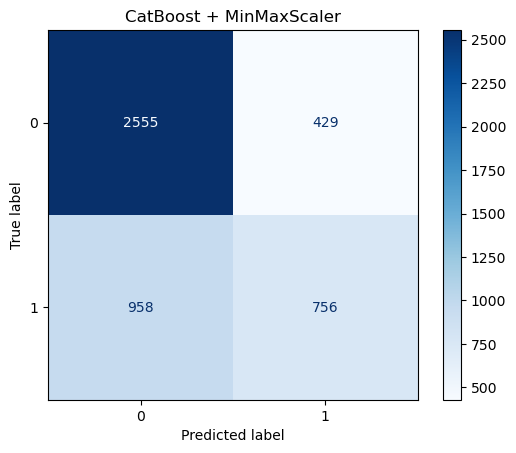


 Training LightGBM with MinMaxScaler
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 6715, number of negative: 12077
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 239
[LightGBM] [Info] Number of data points in the train set: 18792, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.357333 -> initscore=-0.586959
[LightGBM] [Info] Start training from score -0.586959
✅ Accuracy: 0.7092


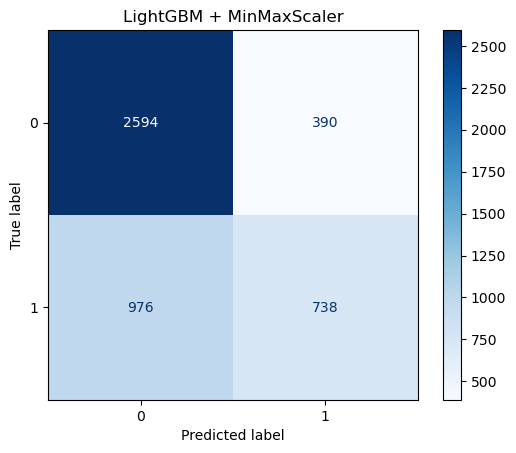


 Training XGBoost with RobustScaler
✅ Accuracy: 0.6982


c:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [22:03:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


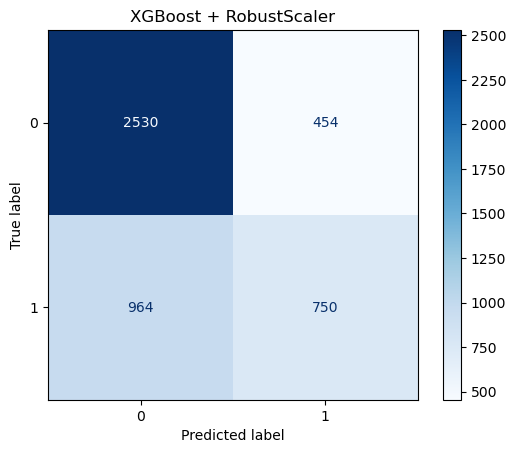


 Training CatBoost with RobustScaler
✅ Accuracy: 0.7048


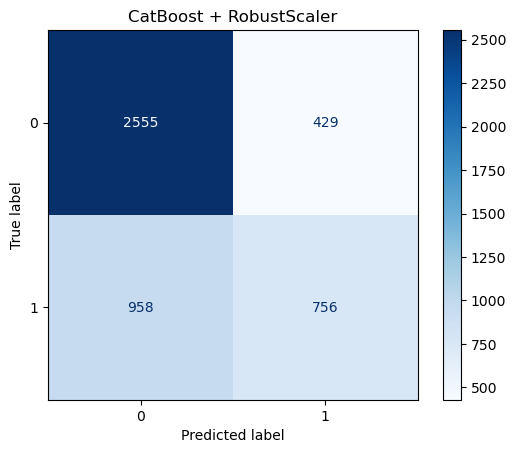


 Training LightGBM with RobustScaler
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 6715, number of negative: 12077
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000945 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 238
[LightGBM] [Info] Number of data points in the train set: 18792, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.357333 -> initscore=-0.586959
[LightGBM] [Info] Start training from score -0.586959
✅ Accuracy: 0.7092


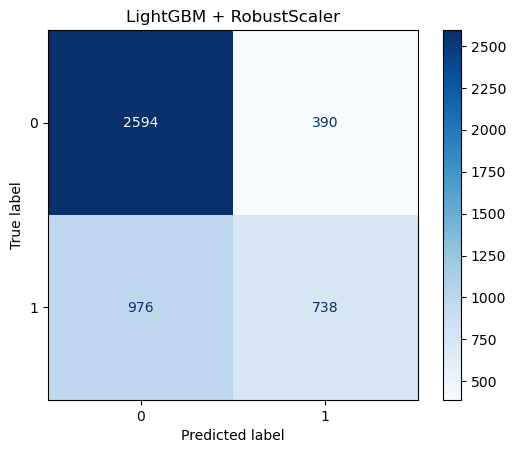


 Training XGBoost with MaxAbsScaler
✅ Accuracy: 0.6982


c:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [22:04:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


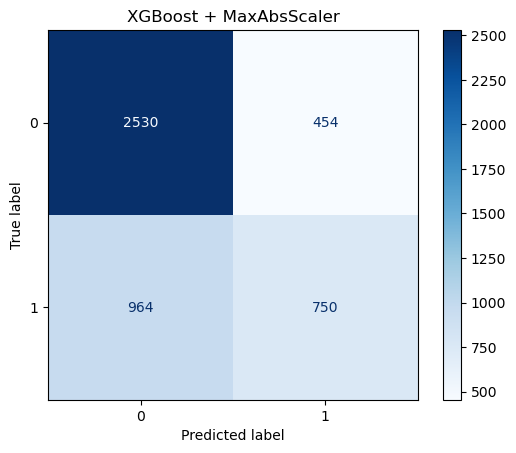


 Training CatBoost with MaxAbsScaler
✅ Accuracy: 0.7048


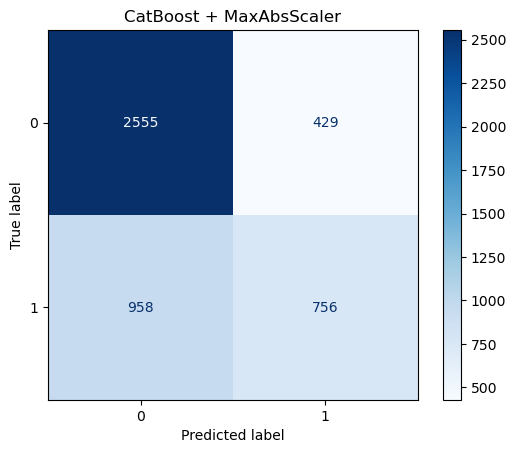


 Training LightGBM with MaxAbsScaler
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 6715, number of negative: 12077
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001051 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 243
[LightGBM] [Info] Number of data points in the train set: 18792, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.357333 -> initscore=-0.586959
[LightGBM] [Info] Start training from score -0.586959
✅ Accuracy: 0.7092


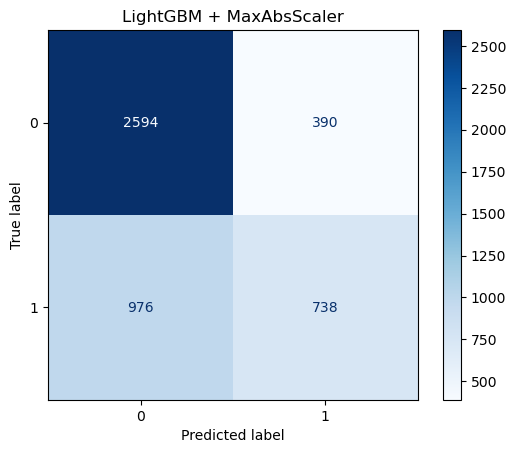

,Scaler,Model,Accuracy
0,StandardScaler,LightGBM,0.709238
1,MinMaxScaler,LightGBM,0.709238
2,RobustScaler,LightGBM,0.709238
3,MaxAbsScaler,LightGBM,0.709238
4,StandardScaler,CatBoost,0.704768
5,MinMaxScaler,CatBoost,0.704768
6,RobustScaler,CatBoost,0.704768
7,MaxAbsScaler,CatBoost,0.704768
8,StandardScaler,XGBoost,0.698169
9,MinMaxScaler,XGBoost,0.698169


In [4]:
# Scaler vs Model Performance Comparison
# We compare four scalers with three ML models to identify the best preprocessing pipeline for our classification task.

# 📦 Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Load and Clean Dataset
df = pd.read_csv(r"C:\Users\Admin\Downloads\Test_data.csv")
df['previous_year_rating'] = df['previous_year_rating'].fillna(df['previous_year_rating'].mode()[0])
df['age'] = df['age'].fillna(df['age'].median())
df['length_of_service'] = df['length_of_service'].fillna(df['length_of_service'].median())
df['avg_training_score'] = df['avg_training_score'].fillna(df['avg_training_score'].median())
df['no_of_trainings'] = df['no_of_trainings'].fillna(df['no_of_trainings'].median())

#  Target and Feature Selection
target = 'KPIs_met >80%'
numerical_cols = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'avg_training_score']
X = df.drop(columns=['employee_id', target])
X = pd.get_dummies(X, drop_first=True)
y = df[target]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Scalers and Models
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler(),
    'MaxAbsScaler': MaxAbsScaler()
}

models = {
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42),
    'LightGBM': LGBMClassifier(random_state=42)
}

# 🧪 Train and Evaluate Each Scaler + Model Combo
results = []

for scaler_name, scaler in scalers.items():
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()
    X_train_scaled[numerical_cols] = scaler.fit_transform(X_train_scaled[numerical_cols])
    X_test_scaled[numerical_cols] = scaler.transform(X_test_scaled[numerical_cols])

    for model_name, model in models.items():
        print(f"\n Training {model_name} with {scaler_name}")
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        print(f"✅ Accuracy: {acc:.4f}")

        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap='Blues')
        plt.title(f"{model_name} + {scaler_name}")
        plt.show()

        results.append({
            'Scaler': scaler_name,
            'Model': model_name,
            'Accuracy': acc
        })

# Summary of All Results
results_df = pd.DataFrame(results)
results_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
